- 쇼생크 탈출 Word Cloud

In [1]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

import time
import pandas as pd
from tqdm import tqdm

from urllib.parse import quote
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings('ignore')

import os

driver_name =  os.environ['HOMEDRIVE'] + os.environ['HOMEPATH'] + '\\downloads\\chromedriver.exe'


In [2]:

imdburl = 'https://www.imdb.com/title/tt0111161/reviews/?ref_=tt_ql_2'
driver = webdriver.Chrome(driver_name)
driver.get(imdburl)
time.sleep(2)

In [3]:
review_total = int(driver.find_element(By.CSS_SELECTOR, '.header > div > span').text.split()[0].replace(',',''))

In [4]:
if review_total > 1000:
    click_cnt = 1
else :
    click_cnt = (review_total // 25) - 1

for i in tqdm(range(click_cnt)):
    # print(f'{i} 번째')
    try:
        driver.find_element(By.CLASS_NAME, 'ipl-load-more__button').click()
        time.sleep(4)
    except:
        print('except')
        pass

100%|██████████| 1/1 [00:04<00:00,  4.46s/it]


In [31]:
# driver 는 화면에 나오지 않는 텍스트는 안 가져온다
# contents = driver.find_elements(By.CSS_SELECTOR, '.lister-item-content > div.content')
# Spoiler 나 내용이 긴 글인 경우 아래 화살표를 클릭해야 내용을 볼 수 있도록 되어 있다. 
# 내용까지 필요할 경우 클릭하는 이벤트가 필요하다.
# 클릭하는 버튼 태그들은 다 있고 이것을 보여주는 옵션이 있어 개수는 똑같이 가져온다.
# 그러나 화면에 표시되지 않는 아래 화살표까지 click() 하는 경우가 있을 수 있으므로 
# try ~ except 로 에러를 처리해 준다.
exps = driver.find_elements(By.CLASS_NAME, 'expander-icon-wrapper')
for exp in exps:
    try:
        exp.click()
        time.sleep(1)
    except:
        pass


# print(contents[0].)

In [32]:
# driver로 필요한 내용들을 가져올 수 있다.
# 필요할 경우에 사용한다.

# contents = driver.find_elements(By.CSS_SELECTOR, '.lister-item-content > div.content')
# print(len(contents))
# print(contents[0].text)

50
The Shawshank Redemption is written and directed by Frank Darabont. It is an adaptation of the Stephen King novella Rita Hayworth and Shawshank Redemption. Starring Tim Robbins and Morgan Freeman, the film portrays the story of Andy Dufresne (Robbins), a banker who is sentenced to two life sentences at Shawshank State Prison for apparently murdering his wife and her lover. Andy finds it tough going but finds solace in the friendship he forms with fellow inmate Ellis "Red" Redding (Freeman). While things start to pick up when the warden finds Andy a prison job more befitting his talents as a banker. However, the arrival of another inmate is going to vastly change things for all of them.

There was no fanfare or bunting put out for the release of the film back in 94, with a title that didn't give much inkling to anyone about what it was about, and with Columbia Pictures unsure how to market it, Shawshank Redemption barely registered at the box office. However, come Academy Award time 

In [7]:
# with open('data/Shawshank.html', 'w') as f:
#     f.write(driver.page_source)

# BeautifulSoup 으로 변환 후 원하는 데이터 가져오기
soup = BeautifulSoup(driver.page_source, 'html.parser')

In [8]:
cons = soup.select('.lister-item-content')
print(len(cons))

# 읽으면서 파일에 저장한다.
with open('data/Shawshank.txt', 'w') as f:
    con_list = []
    for con in cons:
        title = con.select_one('.title').get_text().strip()
        rate = con.select('.rating-other-user-rating > span')
        rating = np.nan if len(rate) ==0 else int(rate[0].get_text().strip())   # 값이 없으면 결츨치로 만듦

        contents = con.select_one('.content > div').get_text()

        f.write( contents + '\n')
        con_list.append({'제목': title, '평점': rating, 'REVIEW:': contents })

df = pd.DataFrame(con_list)

driver.close()

997


In [35]:
# HSB: Hue, Saturation(채도), Lightness(명도)
def grey_color(word, font_size, position, orientation, random_state, **kwargs):
    return f'hsl(0, 0%, {np.random.randint(60, 101)}%)'


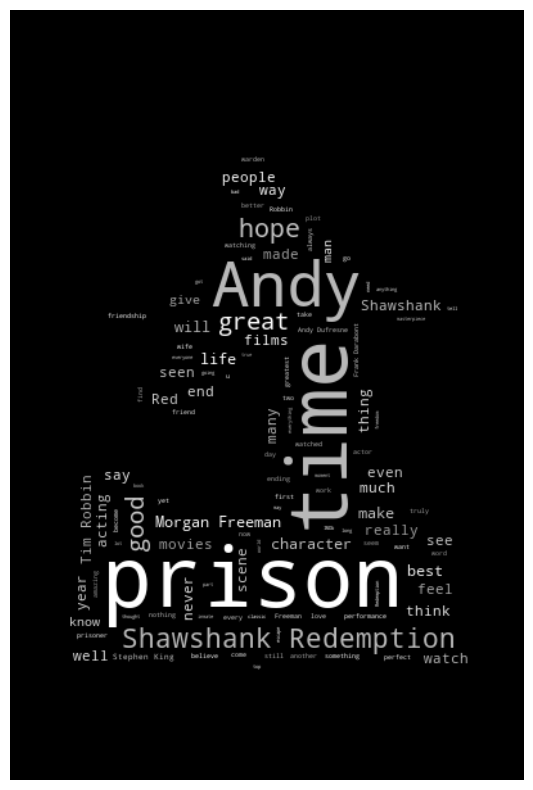

In [36]:
# 필요한 경우 파일로 저장
with open('data/Shawshank.txt') as f:
    text = f.read()

# 제외시키고 싶은 단어 추가
# STOPWORDS는 데이터 타입이 set 
sw = STOPWORDS
sw.add('movie')
sw.add('one')
sw.add('story')
sw.add('film')

mask = np.array(Image.open('data/show.png'))
wc = WordCloud(
        mask=mask, max_words=1000, stopwords=sw,
        margin=10, random_state=2023
    ).generate(text)

default_colors = wc.to_array

plt.figure(figsize=(10, 10))
plt.imshow(wc.recolor(color_func=grey_color, random_state=2023),
           interpolation='bilinear')
plt.axis('off')
plt.show()